<a href="https://colab.research.google.com/github/RanjithAmirneni/DataScience/blob/main/08-NaturalLanguageProcessing(NLP)/02_Text_To_Numbers_Representation(Feature_Extraction)%7CBag_of_Words_%7C_Tf_Idf_%7C_OneHotEncoding_%7C_N_grams%2C_Bi_grams_%2CUni_grams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame({'text':['people watch campusx', 'campusx watch campusx', 'people write comment', 'campusx write comment'],'output':[1,1,0,0]})

In [ ]:
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


## 01-Bag Of Words:

It’s an algorithm that transforms the text into fixed-length vectors. This is possible by counting the number of times the word is present in a document. The word occurrences allow to compare different documents and evaluate their similarities for applications, such as search, document classification, and topic modeling.

The reason for its name, “Bag-Of-Words”, is due to the fact that it represents the sentence as a bag of terms. It doesn’t take into account the order and the structure of the words, but it only checks if the words appear in the document.

### **Why is the Bag-of-Words algorithm used?**

So, why bag-of-words, what is wrong with the simple and easy text?  

One of the biggest problems with text is that it is messy and unstructured, and machine learning algorithms prefer structured, well defined fixed-length inputs and by using the Bag-of-Words technique we can convert variable-length texts into a fixed-length vector.

Also, at a much granular level, the machine learning models work with numerical data rather than textual data. So to be more specific, by using the bag-of-words (BoW) technique, we convert a text into its equivalent vector of numbers.

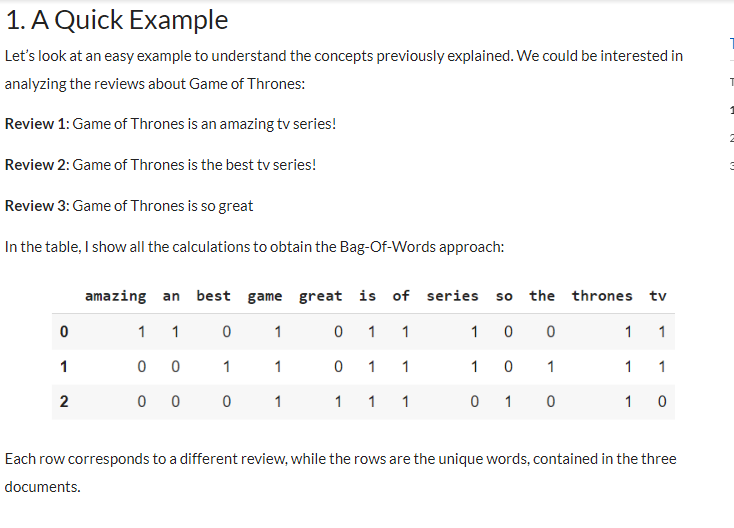

### Bag Of words sample example code:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
bow = cv.fit_transform(df['text'])

In [ ]:
print(cv.vocabulary_)

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}


In [ ]:
print(bow[0].toarray())
print(bow[1].toarray())

[[1 0 1 1 0]]
[[2 0 0 1 0]]


**Prediction:**

So during prediction time even if you face **Out of vocabulary(OOV)** issue that is if there is any kind of new words that are not tranined to the model as they were not present in the initial vocabulary.

Then also it will be automatically handled by BOW internally. As like in below example. 

In [ ]:
cv.transform(["campusx watch and write comment of campusx"]).toarray()


array([[2, 1, 0, 1, 1]])

### **Hyper parameters of CountVectorizer class in sklearn:**

class sklearn.feature_extraction.text.CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)[source]

### **Conclusion for Bag Of Words:**

- That’s it! Bag-Of-Words is quite simple to implement as you can see. Of course, we only considered only unigram (single words) or bigrams(couples of words), but also trigrams can be taken into account to extract features.

- Stop words can be removed too as we saw, but there are still some disadvantages. The order and the meaning of the words are lost using this method. 

- For this reason, other approaches are preferred to extract features from the text, like TF-IDF, which I will talk about in the next post of the series. Thanks for reading. Have a nice day!

#### **Advantages of Bag Of words:**

- It simple and intuitive
- Able to over come the OOV (out of vocabulory) problem.

#### **DisAdvantages of Bag Of words:**
- **Sparsity:** Here in BOW also this problem occures, imagine if you are working with a real world dataset then your vocabulary will be very big and then you may have lot of zeros in the vectors.Due to which handling it will be difficult for the ML alogos and there will be problem of overfitting due to this Sparsity.

- **Ignoring the OOV(out of vocabulary) words :** This may cause the loss of information.

- **Ordering of words gets changed:** It ignore the order of the words which will impact in loosing the symantic meaning of the sentence or document.

- BOW will not be able to caputure the changes in senetence due to small single word changes. Example
        - this is a very good picture
        - this is not a very good picture
so if you remove 'not' then there will be no big difference in both the sentences.So both of them will be alike but the symantic meaning varies a lot due to the small word changes in the sentence and BOW will not be able to capture these changes. This kind of problem is handled by our next technique called as n-grams.


## **02-N-Grams,Unigrams,Bigrams:** (Bag Of N-Grams)

**What are n-grams?**

N-grams are continuous sequences of words or symbols or tokens in a document. In technical terms, they can be defined as the neighbouring sequences of items in a document. They come into play when we deal with text data in NLP(Natural Language Processing) tasks.

- N-grams of texts are extensively used in text mining and natural language processing tasks. They are basically a set of co-occurring words within a given window and when computing the n-grams you typically move one word forward (although you can move X words forward in more advanced scenarios).

- For example, for the sentence “The cow jumps over the moon”. If N=2 (known as bigrams), then the ngrams would be:

          - the cow
          - cow jumps
          - jumps over
          - over the
          - the moon

- So you have 5 n-grams in this case. Notice that we moved from the->cow to cow->jumps to jumps->over, etc, essentially moving one word forward to generate the next bigram.

If N=3, the n-grams would be:

        - the cow jumps
        - cow jumps over
        - jumps over the
        - over the moon


- So you have 4 n-grams in this case. When N=1, this is referred to as unigrams and this is essentially the individual words in a sentence. When N=2, this is called bigrams and when N=3 this is called trigrams. When N>3 this is usually referred to as four grams or five grams and so on.

- **How many N-grams in a sentence?**

Q) If X=Num of words in a given sentence K, the number of n-grams for sentence K would be:


image.png

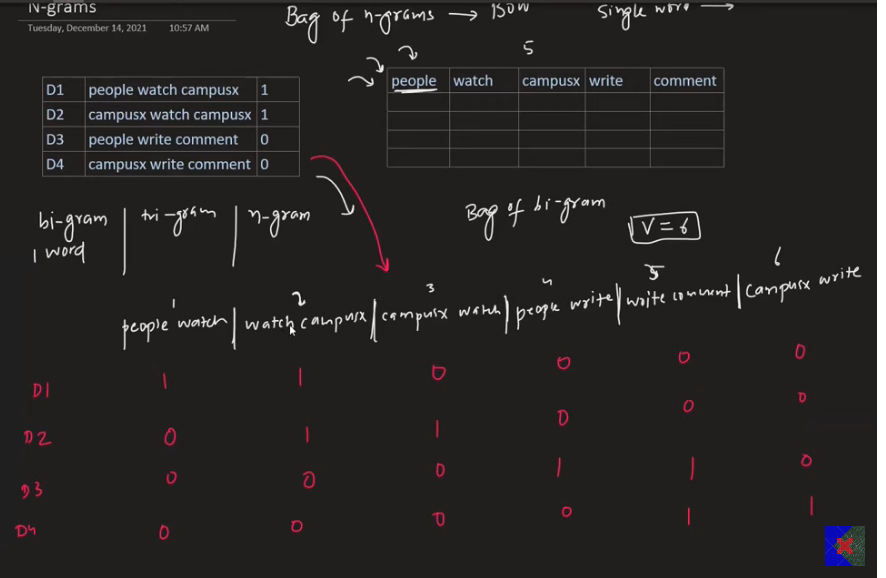

- Similarly we can perform tri gram as well, We cannot perform Quad Gram on this sentence as we dont have more than 3 words in a sentence if you try to perform also it will throw an error.

### **Code for n-grams:**

we will use the same code as of Bag Of words same class  but we have a parameter call **ngram_range this by default is (1,1) which means unigram, But for bigram and trigram we can change this parameter accordingly.**

class sklearn.feature_extraction.text.CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\b\w\w+\b',ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)[source]

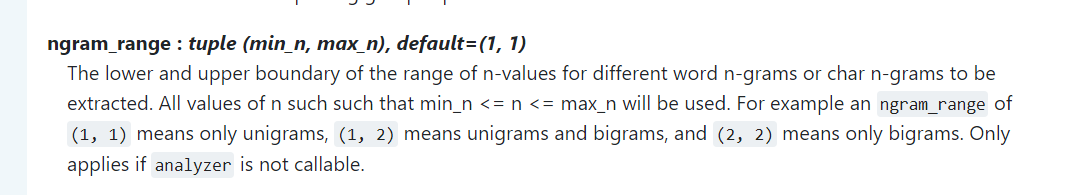

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2)) #If you provide ngram_range=(1,2) it will create both unigram and bigram both
#If you provide ngram_range=(2,2) it will create bigram 
#If you provide ngram_range=(3,3) it will create trigram 

In [ ]:
bow = cv.fit_transform(df['text'])

In [ ]:
print(cv.vocabulary_)

{'people watch': 2, 'watch campusx': 4, 'campusx watch': 0, 'people write': 3, 'write comment': 5, 'campusx write': 1}


In [ ]:
print(bow[0].toarray())
print(bow[1].toarray())

[[0 0 1 0 1 0]]
[[1 0 0 0 1 0]]


In [ ]:
cv.transform(["campusx watch and write comment of campusx"]).toarray()


array([[1, 0, 0, 0, 0, 1]])

**So its recommended to use Bi or tri grams comapred to unigrams to capture the better sequence and symmantic of the sentences.**

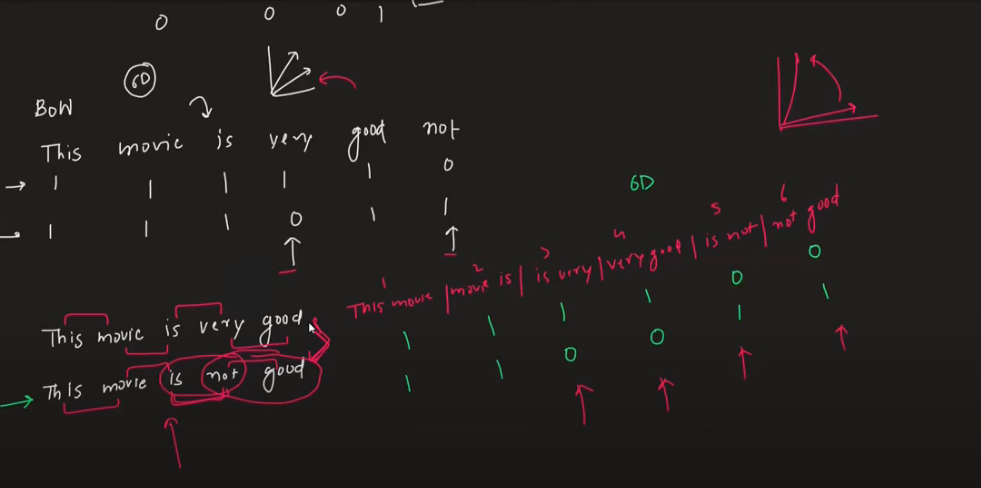

### **Advantages of n-grams:**
 - Able to capture the symmantic meaning of the sentence.
 - Easy to implement and intuitive to understand
 
**DisAdvantages of n-grams:**

- If you talk about large datasets when you use unigrams then no of tokens/terms in your vocabulary would be less than bigrams or trigrams or more.

- If you go with the trigrams then your dimentionality of the vocabulary will increases. Due to which it takes more time in computation, there by more time will be taken for model traning and prediction as well

- So as you increase the n in n-grams then your time complexity will increases and model becomes slow.

- Here in n-grams also we don't have solution to the out of vocabulary(OOV) problem. That is if you go any new sentence during the time of prediction then we have only solution of ignoring it other than that we don't have any other solution for it. Because of which we may loose some valuable information.






## **03-Tf-IDF:**

**Formulae:**

image.png

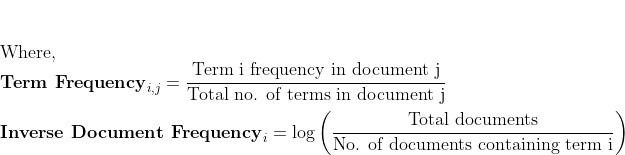

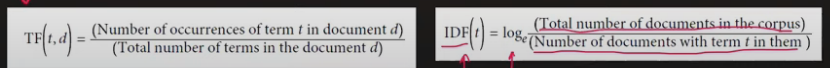

**V.IMP** **Q) Why do take log while calculating the IDF and no log while calculating the TF?**

- 

In [ ]:
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()


In [ ]:
tfidf.fit_transform(df['text']).toarray()

array([[0.49681612, 0.        , 0.61366674, 0.61366674, 0.        ],
       [0.8508161 , 0.        , 0.        , 0.52546357, 0.        ],
       [0.        , 0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.49681612, 0.61366674, 0.        , 0.        , 0.61366674]])

In [ ]:
print(tfidf.idf_)
print(tfidf.get_feature_names_out())

[1.22314355 1.51082562 1.51082562 1.51082562 1.51082562]
['campusx' 'comment' 'people' 'watch' 'write']
